# Resonances in 1D

In this notebook, we use the transfer matrix method to analyze the phenomenon of resonances in quantum mechanics.

We will take for granted the following function, which returns the transfer matrix for a 1D scatterer consisting of piecewise-uniform potential segments $[V_0, V_1, \dots]$ and segment lengths $[L_0, L_1, \dots]$.  For details about the underlying formulas, consult the [notes on the transfer matrix method](http://www1.spms.ntu.edu.sg/~ydchong/teaching/PH4401_Appendix_B_transfer_matrix.pdf).

In [6]:
from scipy import *
import matplotlib.pyplot as plt

## Calculate transfer matrix for a 1D piecewise-uniform potential.
##
## L    -- array of segment lengths (left to right)
## V    -- array of the corresponding potentials
## Vout -- external potential (assumed same on both sides)
## E    -- energy

def transfer_matrix(L, V, Vout, E):
    assert len(L) == len(V)

    kext = sqrt(2*(E-Vout))
    k    = append(sqrt(2*(E-V)), [kext])

    p = kext/k[0]
    M = 0.5*array([[1+p,1-p], [1-p,1+p]], dtype=complex)  # ext space into first segment

    for j in range(len(L)):
        eikL = exp(1j*k[j]*L[j])
        p    = k[j]/k[j+1]
        M    = dot(diag([eikL, 1./eikL]), M)              # propagation within current segment
        M    = dot(0.5*array([[1+p,1-p], [1-p,1+p]]), M)  # propagation into next segment
    return M

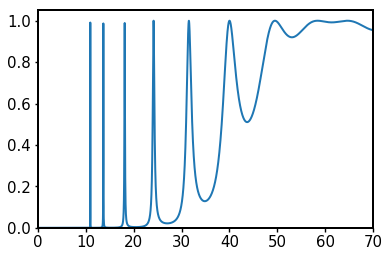

In [7]:
def resonance_demo_1(U, Vb, a, b, Emax):
    Evec = linspace(0.01, Emax, 5000)

    psim = empty(len(Evec), dtype=complex)
    psip = empty(len(Evec), dtype=complex)

    L, V = array([b-a, 2*a, b-a]), array([Vb, Vb-U, Vb])
    for jj in range(len(Evec)):
        k = sqrt(2*Evec[jj])
        M = transfer_matrix(L, V, 0.0, Evec[jj])
        psim[jj] = -M[1,0]/M[1,1]*exp(-2j*k*b)
        psip[jj] = M[0,0] * exp(-2j*k*b) + M[0,1]*psim[jj]

    plt.plot(Evec, abs(psip)**2)
    plt.xlim(0, Emax)
    plt.ylim(0,1.05)
    plt.show()

resonance_demo_1(20.0, 30.0, 1.0, 1.4, 70.0)
